In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates




In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            752 non-null    datetime64[ns]
 1   Open            752 non-null    float64       
 2   High            752 non-null    float64       
 3   Low             752 non-null    float64       
 4   Close           752 non-null    float64       
 5   Volume          752 non-null    float64       
 6   MA7             746 non-null    float64       
 7   MA14            739 non-null    float64       
 8   Volatility      723 non-null    float64       
 9   RSI             752 non-null    float64       
 10  MACD_Line       752 non-null    float64       
 11  Signal_Line     752 non-null    float64       
 12  MACD_Histogram  752 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 76.5 KB


In [163]:
df['Volume'] = df['Volume'].replace({',': ''}, regex=True).astype(float)


In [130]:
df = pd.read_csv('..\data\TSLA_1yr.csv')




In [132]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date
df = df.sort_values(by='Date')


# Display first few rows

# Display first few rows


In [133]:
df.tail(5)

,Date,Open,High,Low,Close,Volume
4,2025-03-13,248.13,248.29,232.60,240.68,"114,813,508"
3,2025-03-14,247.31,251.58,240.73,249.98,"100,242,305"
2,2025-03-17,245.06,245.40,232.80,238.01,"111,900,602"
1,2025-03-18,228.16,230.10,222.28,225.31,"111,477,602"
0,2025-03-19,231.61,241.41,229.20,235.86,"111,993,797"


In [134]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Check the date range in the dataset
print("\nDate Range:\n", df['Date'].min(), "to", df['Date'].max())


Missing Values:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Summary Statistics:
                                 Date        Open        High         Low  \
count                            752  752.000000  752.000000  752.000000   
mean   2023-09-17 14:56:10.212765952  239.927713  245.172128  234.162593   
min              2022-03-21 00:00:00  103.000000  111.750000  101.810000   
25%              2022-12-15 18:00:00  189.120000  194.180000  185.387500   
50%              2023-09-18 12:00:00  232.125000  237.770000  226.730000   
75%              2024-06-17 06:00:00  267.150000  272.712500  260.955000   
max              2025-03-19 00:00:00  475.900000  488.540000  457.510000   
std                              NaN   66.744286   68.187365   64.747727   

            Close  
count  752.000000  
mean   239.609269  
min    108.100000  
25%    189.875000  
50%    232.980000  
75%    265.280000  
max    479.860000  
std     66.374204  

Date Range

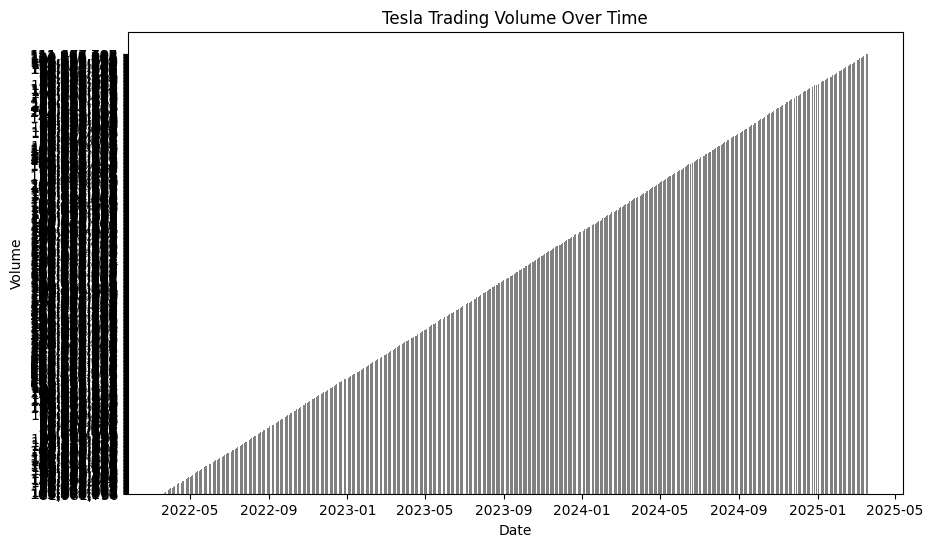

In [139]:
# Plot trading volume over time
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Volume'], color='gray', width=1)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Tesla Trading Volume Over Time")
plt.show()


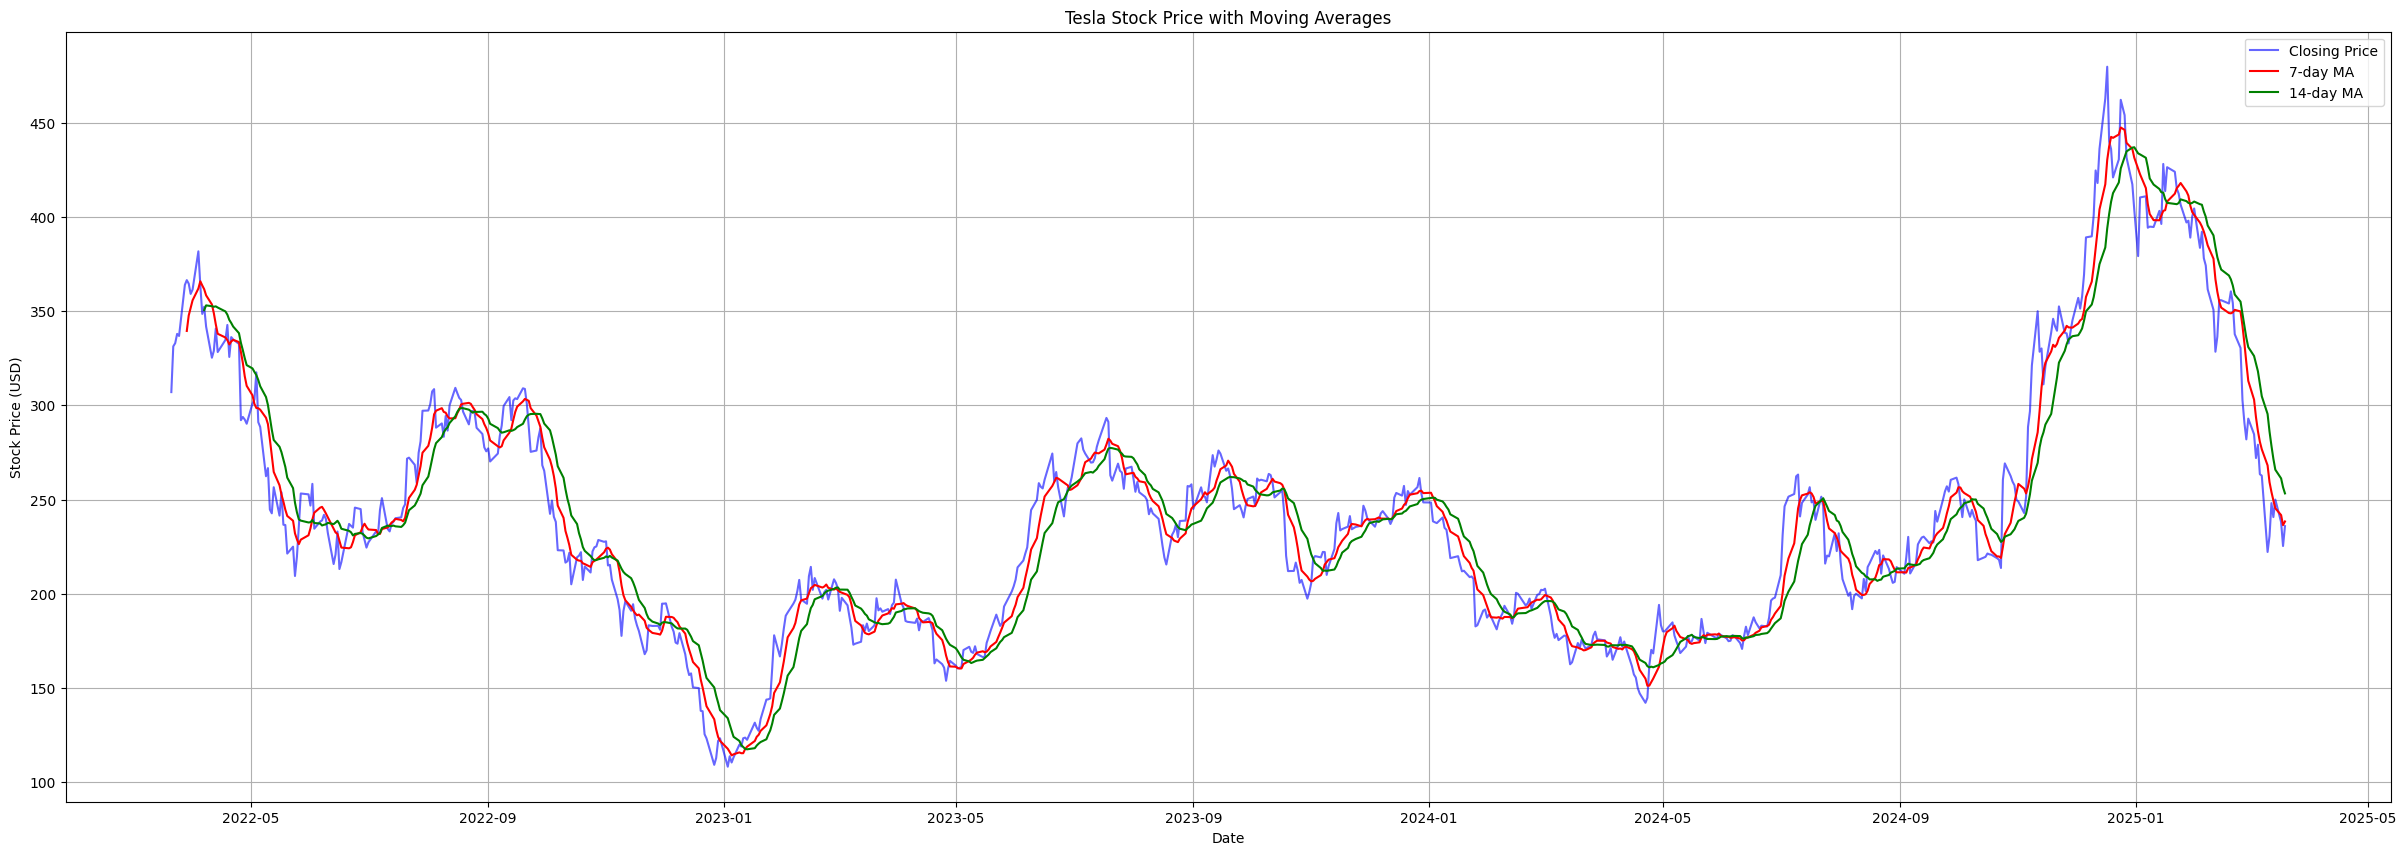

In [146]:
# Compute moving averages (50-day and 200-day)
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA14'] = df['Close'].rolling(window=14).mean()

# Plot the closing price with moving averages
plt.figure(figsize=(30, 10))
plt.plot(df['Date'], df['Close'], label="Closing Price", color='blue', alpha=0.6)
plt.plot(df['Date'], df['MA7'], label="7-day MA", color='red')
plt.plot(df['Date'], df['MA14'], label="14-day MA", color='green')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price with Moving Averages")
plt.legend()
plt.grid()
plt.show()


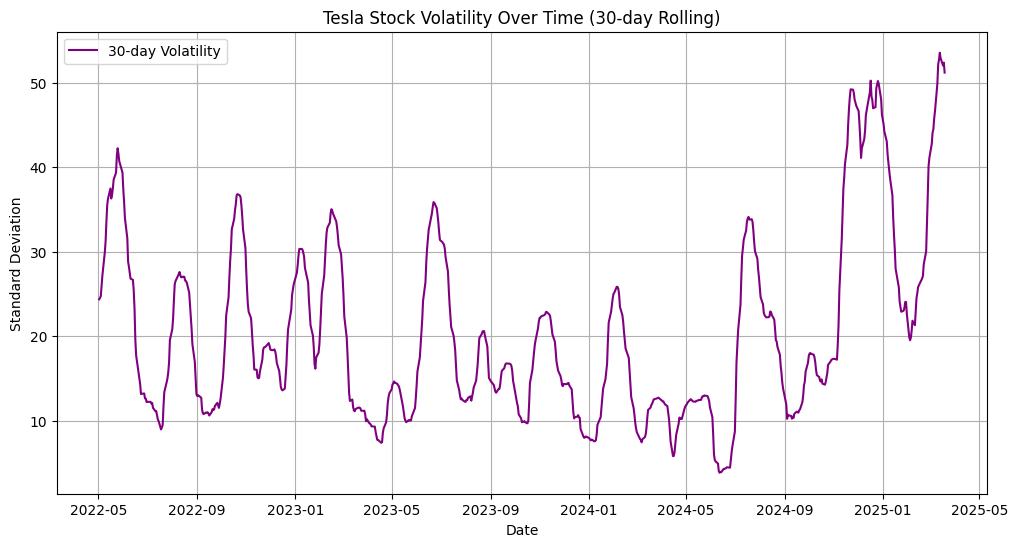

In [141]:
# Compute rolling standard deviation (volatility)
df['Volatility'] = df['Close'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], label="30-day Volatility", color='purple')
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.title("Tesla Stock Volatility Over Time (30-day Rolling)")
plt.legend()
plt.grid()
plt.show()


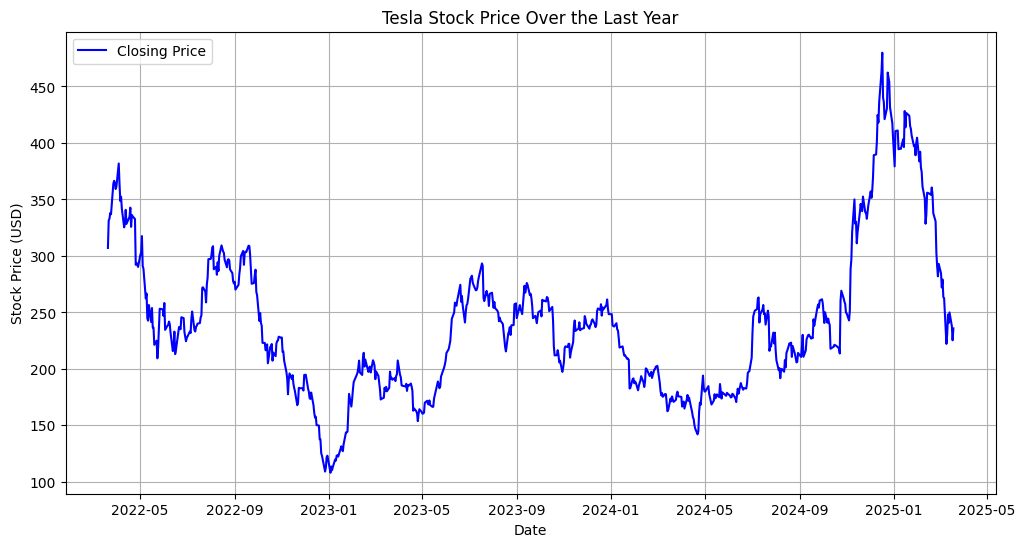

In [142]:
# Plot the closing price over the past year
plt.figure(figsize=(12, 6))
plt.plot(df_1yr['Date'], df_1yr['Close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price Over the Last Year")
plt.legend()
plt.grid()
plt.show()


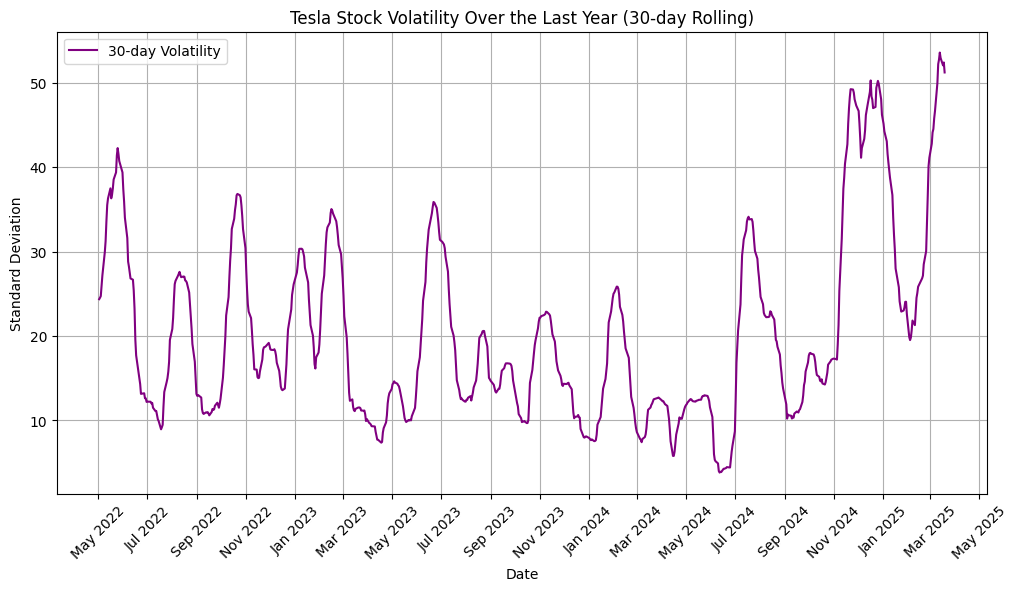

In [147]:
# Compute rolling standard deviation (volatility)
df_1yr['Volatility'] = df_1yr['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df_1yr['Date'], df_1yr['Volatility'], label="30-day Volatility", color='purple')

# Format the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.title("Tesla Stock Volatility Over the Last Year (30-day Rolling)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [149]:
import numpy as np

# Function to calculate RSI
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = np.where(delta > 0, delta, 0)  # Only keep gains
    loss = np.where(delta < 0, -delta, 0)  # Only keep losses

    avg_gain = pd.Series(gain).rolling(window=window, min_periods=1).mean()
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=1).mean()

    rs = avg_gain / (avg_loss + 1e-10)  # Avoid division by zero
    rsi = 100 - (100 / (1 + rs))
    
    df['RSI'] = rsi
    return df

# Calculate RSI for both datasets
df = calculate_rsi(df)



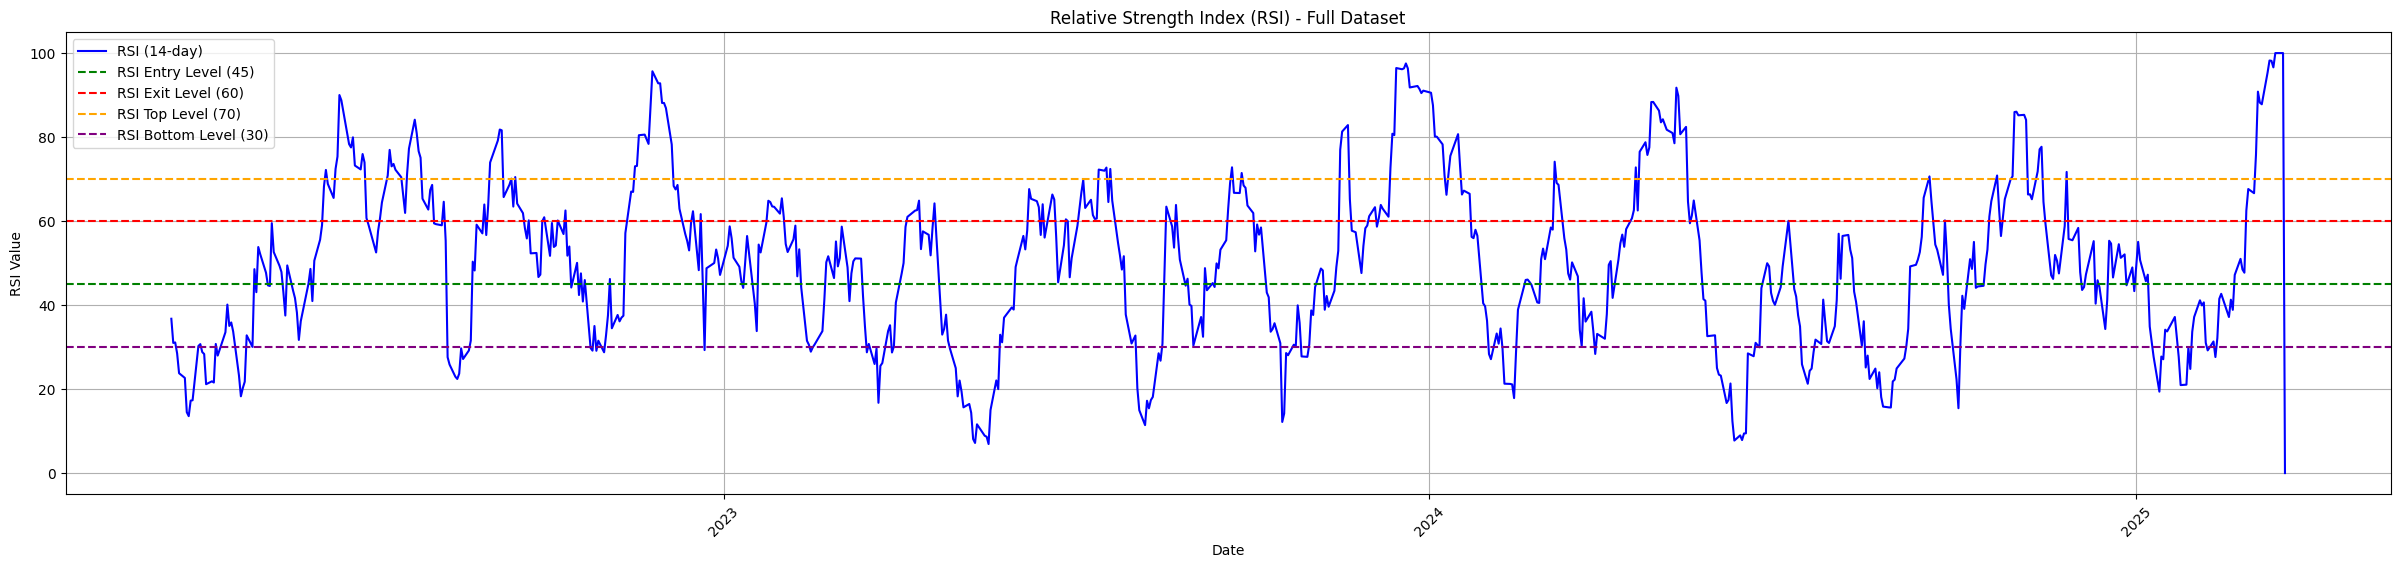

In [150]:
import matplotlib.dates as mdates

plt.figure(figsize=(30, 6))
plt.plot(df['Date'], df['RSI'], label="RSI (14-day)", color='blue')

# Add horizontal reference lines
plt.axhline(45, linestyle="--", color="green", label="RSI Entry Level (45)")
plt.axhline(60, linestyle="--", color="red", label="RSI Exit Level (60)")
plt.axhline(70, linestyle="--", color="orange", label="RSI Top Level (70)")
plt.axhline(30, linestyle="--", color="purple", label="RSI Bottom Level (30)")

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.title("Relative Strength Index (RSI) - Full Dataset")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [152]:

# Compute MACD, Signal Line, and Histogram
def compute_macd(data, short_period=7, long_period=14, signal_period=9):
    """Calculates MACD, Signal Line, and MACD Histogram."""
    data['MACD_Line'] = data['Close'].ewm(span=short_period, adjust=False).mean() - data['Close'].ewm(span=long_period, adjust=False).mean()
    data['Signal_Line'] = data['MACD_Line'].ewm(span=signal_period, adjust=False).mean()
    data['MACD_Histogram'] = data['MACD_Line'] - data['Signal_Line']
    return data

# Apply MACD calculation to the dataset
df = compute_macd(df)



In [154]:
df.head(30)

,Date,Open,High,Low,Close,Volume,MA7,MA14,Volatility,RSI,MACD_Line,Signal_Line,MACD_Histogram
751,2022-03-21,304.99,314.28,302.36,307.05,"81,981,736",NaN,NaN,NaN,36.744320,0.000000,0.000000,0.000000
750,2022-03-22,310.00,332.62,307.25,331.33,"105,868,670",NaN,NaN,NaN,30.978798,2.832667,0.566533,2.266133
749,2022-03-23,326.65,346.90,325.47,333.04,"120,676,263",NaN,NaN,NaN,31.105279,4.778978,1.409022,3.369956
748,2022-03-24,336.58,341.50,329.60,337.97,"68,920,965",NaN,NaN,NaN,28.486726,6.459947,2.419207,4.040740
747,2022-03-25,336.00,340.60,332.44,336.88,"62,031,605",NaN,NaN,NaN,23.776866,7.210079,3.377382,3.832698
746,2022-03-28,355.03,365.96,351.20,363.95,"102,506,171",NaN,NaN,NaN,22.652673,10.615496,4.825005,5.790491
745,2022-03-29,369.33,371.59,357.70,366.52,"73,614,887",339.534286,NaN,NaN,14.490220,12.775000,6.415004,6.359996
744,2022-03-30,363.72,371.32,361.33,364.66,"59,865,062",347.764286,NaN,NaN,13.555015,13.535844,7.839172,5.696673
743,2022-03-31,364.86,367.71,358.88,359.20,"48,992,811",351.745714,NaN,NaN,17.251318,12.942199,8.859777,4.082421
742,2022-04-01,360.38,364.92,355.55,361.53,"54,263,277",355.815714,NaN,NaN,17.334181,12.396755,9.567173,2.829583


In [165]:
from sklearn.preprocessing import MinMaxScaler
# Sort the data by date
df = df.sort_values(by='Date').reset_index(drop=True)


# Define a function to preprocess the data for LSTM
def preprocess_lstm_data(data, lookback=60):
    """
    Prepares the dataset for LSTM training:
    - Normalizes numeric features.
    - Creates time-series sequences.
    - Generates buy/sell/hold labels.
    
    Parameters:
    - data: DataFrame containing stock price & technical indicators.
    - lookback: Number of past days to consider for each sample.
    
    Returns:
    - X (features), y (labels), and scaler (for inverse transformation).
    """
    # Select relevant features for normalization
    features = ['Close', 'Volume', 'RSI', 'MACD_Line', 'Signal_Line', 'MACD_Histogram']
    
    # Ensure the dataset contains necessary columns
    if not all(feature in data.columns for feature in features):
        raise ValueError("Missing required columns in the dataset. Ensure all indicators are computed.")

    # Normalize features using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    data[features] = scaler.fit_transform(data[features])

    # Create sequences for LSTM input
    X, y = [], []
    for i in range(lookback, len(data) - 1):
        X.append(data[features].iloc[i - lookback:i].values)  # Last 'lookback' days as input
        future_return = (data['Close'].iloc[i + 1] - data['Close'].iloc[i]) / data['Close'].iloc[i]  # Future return

        # Assign labels based on future return & indicators
        if future_return > 0.01 and data['RSI'].iloc[i] < 40 and data['MACD_Line'].iloc[i] > data['Signal_Line'].iloc[i]:
            label = 1  # Buy
        elif future_return < -0.01 and data['RSI'].iloc[i] > 65 and data['MACD_Line'].iloc[i] < data['Signal_Line'].iloc[i]:
            label = -1  # Sell
        else:
            label = 0  # Hold
        
        y.append(label)

    return np.array(X), np.array(y), scaler

# Apply preprocessing to both datasets
X, y, scaler = preprocess_lstm_data(df)  # Full dataset


# Display dataset shape and class distribution
X.shape, y.shape, np.unique(y, return_counts=True)

C:\Users\risha\AppData\Local\Temp\ipykernel_11392\3349062560.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  future_return = (data['Close'].iloc[i + 1] - data['Close'].iloc[i]) / data['Close'].iloc[i]  # Future return


((691, 60, 6), (691,), (array([0, 1]), array([597,  94])))

In [166]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Convert labels to categorical (One-Hot Encoding for multi-class classification)
y_categorical = to_categorical(y, num_classes=2)  # Only 2 classes (Buy, Hold), since Sell isn't present

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y)

# Define the LSTM model architecture
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(2, activation='softmax')  # 2 classes (Buy, Hold)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the LSTM model
lstm_model = build_lstm_model((X_train.shape[1], X_train.shape[2]))

# Display the model summary
lstm_model.summary()


e:\Personal\GitHub\ML-tsla-stock-prediction\sp_venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,927 (128.62 KB)

 Trainable params: 32,927 (128.62 KB)

 Non-trainable params: 0 (0.00 B)

In [167]:
history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7984 - loss: 0.5411 - val_accuracy: 0.8633 - val_loss: 0.3888
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8773 - loss: 0.3617 - val_accuracy: 0.8633 - val_loss: 0.3896
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8658 - loss: 0.3689 - val_accuracy: 0.8633 - val_loss: 0.3565
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8672 - loss: 0.3473 - val_accuracy: 0.8561 - val_loss: 0.3322
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8715 - loss: 0.3300 - val_accuracy: 0.8561 - val_loss: 0.3282
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8786 - loss: 0.3083 - val_accuracy: 0.8561 - val_loss: 0.3225
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8732 - loss: 0.2966 - val_accuracy: 0.8345 - val_loss: 0.3405
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8641 - loss: 0.3148 - val_accuracy: 0.8849 - v

In [168]:
test_loss, test_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8557 - loss: 0.3346
Test Accuracy: 0.8561


In [169]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions on test set
y_pred_probs = lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probability output to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Hold', 'Buy']))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Classification Report:
              precision    recall  f1-score   support

        Hold       0.87      0.98      0.92       120
         Buy       0.33      0.05      0.09        19

    accuracy                           0.86       139
   macro avg       0.60      0.52      0.51       139
weighted avg       0.79      0.86      0.81       139

Confusion Matrix:
[[118   2]
 [ 18   1]]
